# Supervised Learning with scikit-learn

**Scikit-Learn**, also known as sklearn is a python library to implement machine learning models and statistical modelling. Through scikit-learn, we can implement various machine learning models for regression, classification, clustering, and statistical tools for analyzing these models. It also provides functionality for dimensionality reduction, feature selection, feature extraction, ensemble techniques, and inbuilt datasets. We will be looking into these features one by one.

This library is built upon NumPy, SciPy, and Matplotlib.

**Supervised learning** is a type of machine learning where the values to be predicted are already known, and a model is built with the aim of accurately predicting values of previously unseen data. Supervised learning uses features to predict the value of a target variable, such as predicting a basketball player's position based on their points per game. This course will exclusively focus on supervised learning. 

There are two types of supervised learning. 

`1- ` Classification 
   - Used to predict the label, or category, of an observation. For example, we can predict whether a bank transaction is fraudulent or not. As there are two outcomes here - a fraudulent transaction, or non-fraudulent transaction, this is known as binary classification. 
   
`2- ` Regression 

- Used to predict continuous values. For example, a model can use features such as number of bedrooms, and the size of a property, to predict the target variable, price of the property.

### Before you use supervised learning

`1- ` Rrequirements to satisfy before performing supervised learning. 

- No missing values, 
- Data in numeric format
- Data stored as pandas DataFrames or Series, or NumPy arrays. 

`2- ` Perform some exploratory data analysis first 

- To ensure data is in the correct format. Various pandas methods for descriptive statistics, along with appropriate data visualizations, are useful in this step. 

# 1- Classification

Classification model, or classifier, to predict the labels of unseen data. 

**There are four steps**

- Build a classifier.
- Model learns from the labeled data we pass to it. 
- Pass it unlabeled data as input.
- Model predict labels for this unseen data. 

As the classifier learns from the labeled data, we call this the training data

#### k-Nearest Neighbors,
Popular for classification problems. The idea of k-Nearest Neighbors, or KNN, is to predict the label of any data point by looking at the k,

for example, three, closest labeled data points and getting them to vote on what label the unlabeled observation should have. KNN uses majority voting, which makes predictions based on what label the majority of nearest neighbors have. 

**Example on Churn vs Non-Churn**

If we select k (Number of neighbors) = 3, voting result will be RED (Non-Churn)
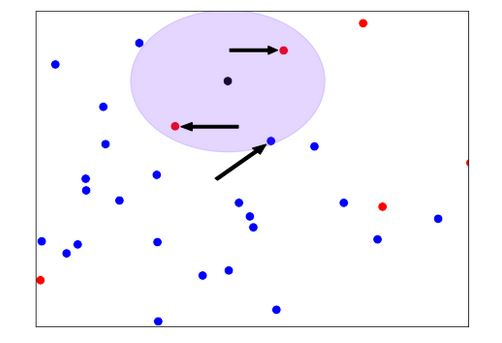

If we select k (Number of neighbors) = 5, voting result will be BLUE (Churn)
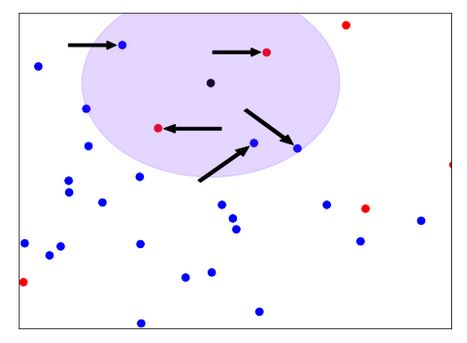

We can visualized the results of a KNN algorithm where the number of neighbors is set to 15. KNN creates a decision boundary to predict if customers will churn. Any customers in the area with a gray background are predicted to churn, and those in the area with a red background are predicted to not churn. This boundary would be used to make predictions on unseen data

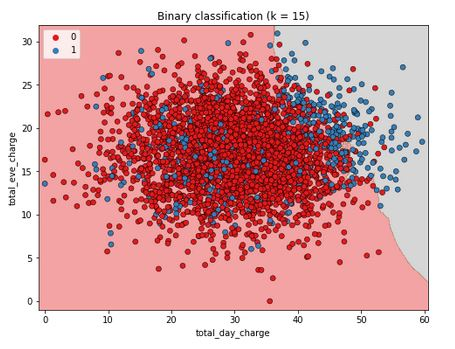

### A) Using scikit-learn to fit a classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier #KNeighborsClassifier

C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
churn_df = pd.read_csv('Dataset/telecom_churn_clean.csv', index_col = 0)

In [3]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   float

- We split our data into X, a 2D array of our features, and y, a 1D array of the target values - in this case, churn status.
- scikit-learn requires that the features are in an array where each column is a feature and each row a different observation. 
- Similarly, the target needs to be a single column with the same number of observations as the feature data. We use the dot-values attribute to convert X and y to NumPy arrays.

In [5]:
#split data
X = churn_df[['account_length', 'customer_service_calls']].values
y = churn_df['churn'].values

In [6]:
#setting n_neighbors equal to 5
knn = KNeighborsClassifier(n_neighbors=5)

In [7]:
knn.fit(X,y)

KNeighborsClassifier()

In [8]:
#create a set of new observations
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])


In [9]:
#Do prediction
knn.predict(X_new)

array([1, 1, 0], dtype=int64)

It predicts 1, which corresponds to 'churn', for the first observation, and 0, which corresponds to 'no churn', for the second and third observations.

### B) Measuring Model Performance

In classification, accuracy is a commonly-used metric. Accuracy is the number of correct predictions divided by the total number of observations. 

- We could compute accuracy on the data used to fit the classifier. 
- However, as this data was used to train the model, performance will not be indicative of how well it can generalize to unseen data, which is what we are interested in! 
- So, we split out data to two portions
    - Trian data to train the model
    - Test data to calculate accuracy 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = churn_df.drop(['churn'], axis = 1).values
y = churn_df['churn'].values

- We commonly use 20-30% of our data as the test set by setting test_size = 0.3
- It is best practice to ensure our split reflects the proportion of labels in our data. So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn. We achieve this by setting **stratify** equal to y

In [12]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 31, stratify = y)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_test, y_test)

0.86

In [15]:
y_pred = knn.predict(X_test)

### C) Model Complexity

Recall that we discussed decision boundaries, which are thresholds for determining what label a model assigns to an observation. 

In the image shown, 

- As k increases, the decision boundary is less affected by individual observations, reflecting a simpler model. Simpler models are less able to detect relationships in the dataset, which is known as underfitting.
- In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as overfitting. 

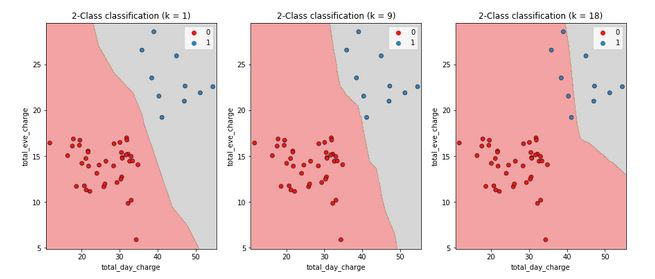

- Largee K = Less Complex Model = Cause Underfitting
- Smaller K = More Complex Model = Cause Overfitting

**Model complexity and over/underfitting diagram**

we can calculate accuracy on the training and test sets using incremental k values, and plot the results. 

In [16]:
neighbors = np.arange(1, 13)
test_accuracy_score = {}
train_accuracy_score = {}

In [17]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors= neighbor)
    knn.fit(X_train, y_train)
    train_accuracy_score[neighbor] = knn.score(X_train, y_train)
    test_accuracy_score[neighbor] = knn.score(X_test, y_test)
    

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

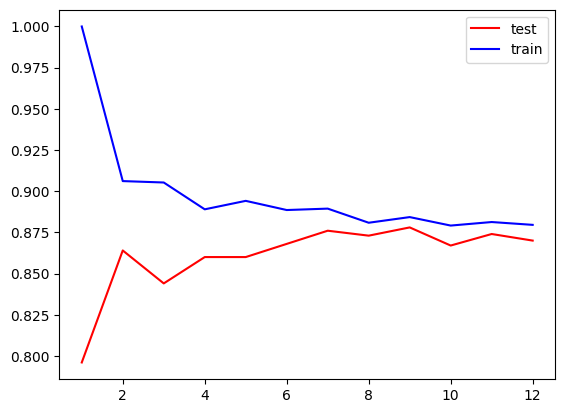

In [19]:
plt.plot( neighbors, test_accuracy_score.values(), color = 'r', label = 'test')
plt.plot( neighbors, train_accuracy_score.values(), color = 'b', label = 'train')
plt.legend()
plt.show()

As k increases beyond 9 we see underfitting where performance plateaus on both test and training sets, as indicated in this plot.

See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. 

For the test set, accuracy peaks with 9 neighbors, suggesting it is the optimal value for our model.

# 2- Regression

### A) Fitting a model

In regression tasks, the target variable typically has continuous values, such as a country's GDP, or the price of a house

In [20]:
sales = pd.read_csv('Dataset/advertising_and_sales_clean.csv')

In [21]:
sales.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [22]:
# Creating feature and target arrays
X = sales['radio'].values
y = sales['sales'].values

- Checking the shape of y and X_bmi, we see that they are both one-dimensional arrays.

In [23]:
X.shape, y.shape

((4546,), (4546,))

- This is fine for y, but our features must be formatted as a two-dimensional array to be accepted by scikit-learn. 
- To convert the shape of X_bmi we apply NumPy's dot-reshape method, passing minus one followed by one. 

In [24]:
#x should be two-dimensional
X = X.reshape(-1,1)

In [25]:
X.shape

(4546, 1)

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [27]:
reg.fit(X, y)

LinearRegression()

In [28]:
predictions  = reg.predict(X)

In [29]:
predictions [:5]

array([ 95491.17119147, 117829.51038393, 173423.38071499, 291603.11444202,
       111137.28167129])

In [30]:
y[:5]

array([ 54732.76,  46677.9 , 150177.83, 298246.34,  56594.18])

''

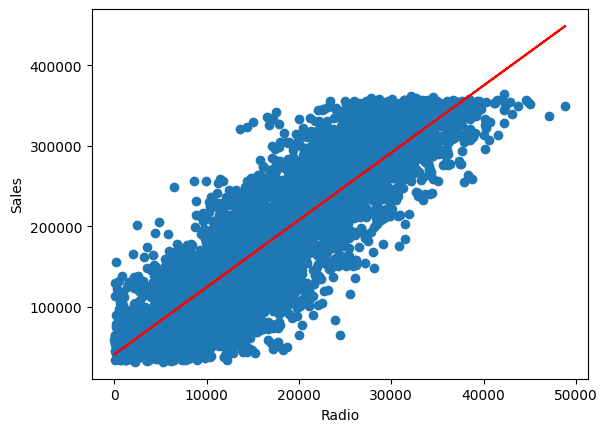

In [31]:
#plot original data
plt.scatter(sales['radio'], sales['sales'])
#plot predication data
plt.plot(X,predictions, color = 'r')
plt.ylabel('Sales')
plt.xlabel('Radio')
;


The Red line represents the linear regression model's fit which appears to have a strong positive correlation. 

### B) Create a model based on all features

In [32]:
X = sales.drop(['sales','influencer'], axis = 1).values
y = sales['sales'].values

In [33]:
X

array([[16000.  ,  6566.23,  2907.98],
       [13000.  ,  9237.76,  2409.57],
       [41000.  , 15886.45,  2913.41],
       ...,
       [44000.  , 19800.07,  5096.19],
       [71000.  , 17534.64,  1940.87],
       [42000.  , 15966.69,  5046.55]])

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_test)

In [38]:
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [302612.27250616  71138.27636848], Actual Values: [304456.87  74531.86]


####  R-squared, Mean squared error and root mean squared error 
- The default metric for linear regression is R-squared, which quantifies the amount of variance in the target variable that is explained by the features. 

- Values can range from zero to one, with one meaning the features completely explain the target's variance. 
- Another way to assess a regression model's performance is to take the mean of the residual sum of squares. This is known as the mean squared error, or MSE. 
- MSE is measured in units of our target variable, squared. For example, if a model is predicting a dollar value, MSE will be in dollars squared. 
- To convert to dollars, we can take the square root, known as the root mean squared error, or RMSE. 

In [39]:
#check model performance
from sklearn.metrics import mean_squared_error

In [40]:
r_squared = reg.score(X_test, y_test)
r_squared

0.998927797895218

In [41]:
mse = mean_squared_error(y_test, y_pred)
mse

9059859.817088442

In [42]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

3009.960102241962

### C) Cross Validation for R-Squared

- Computing R-squared on our test set, the R-squared returned is dependent on the way that we split up the data 
- Test set data may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data.
- Solution : do random split, we use a technique called cross-validation. 

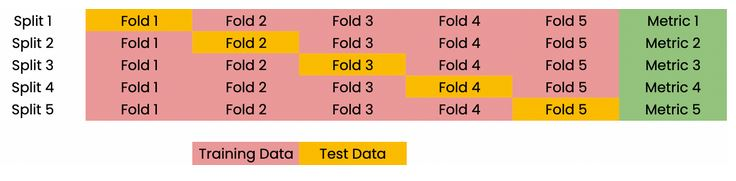

- We begin by splitting the dataset into five groups or folds. 
- Then we set aside the first fold as a test set.
- Fit our model on the remaining four folds, predict on our test set.
- Compute the metric of interest, such as R-squared. 
- Then similarly repeate with the other fold.
- As a result we get five values of R-squared from which we can compute statistics of interest, such as the mean, median, and 95% confidence intervals. 
- **There is, however, a trade-off. Using more folds is more computationally expensive. This is because we are fitting and predicting more times.**


In [43]:
from sklearn.model_selection import cross_val_score , KFold
from sklearn.linear_model import LinearRegression

In [44]:
#create KFold 
KF = KFold(n_splits=6, shuffle=True, random_state=42)
#create linear model
reg = LinearRegression()
# Compute 6-fold cross-validation scores
cv_results = cross_val_score(reg, X, y, cv= KF )

In [45]:
# the results represent the R-Squared for each cv
cv_results

array([0.99900913, 0.99898729, 0.99897163, 0.99898887, 0.99893043,
       0.99905966])

In [46]:
cv_results.mean()

0.9989911695584723

In [47]:
cv_results.std()

3.895599514495595e-05

In [48]:
np.quantile(cv_results, 0.95), np.quantile(cv_results, 0.025)

(0.9990470306922239, 0.9989355812256837)

In [49]:
cv_results.mean()

0.9989911695584723

### D) Regularization
- Regularization in regression, a technique used to avoid overfitting.
- Fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. 
- Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called regularization

#### `1. ` Ridge

We use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha. So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values. When using ridge, we need to choose the alpha value in order to fit and predict.

$$Ridge Loss Function = OLS Function + \alpha * \sum_{i=1}^{n} a_i^2$$

- alpha is known as a hyperparamter we need to choose
- alpha control model complexity. 
    - When alpha equals zero, we are performing OLS, where large coefficients are not penalized and overfitting may occur.
    - A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.

In [50]:
diabetes_df = pd.read_csv('Dataset/diabetes_clean.csv')

In [51]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
y = diabetes_df['glucose'].values
X = diabetes_df.drop(['glucose'], axis = 1).values
names = diabetes_df.drop(['glucose'], axis = 1).columns
names

Index(['pregnancies', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age',
       'diabetes'],
      dtype='object')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [55]:
from sklearn.linear_model import Ridge

#lets test the score for different alpha values
score = []
for alpha in [0.01, 0.1, 1, 10, 100, 1000, 10000]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    score.append(ridge.score(X_test, y_test))

In [56]:
score

[0.33656562923063915,
 0.3365089858005511,
 0.33594162538196626,
 0.3302270992521812,
 0.2841918224719254,
 0.20133354785203272,
 0.17680817147266892]

#### `2. ` Lasso

loss function is the OLS loss function plus the absolute value of each coefficient multiplied by some constant, alpha

$$Ridge Loss Function = OLS Function + \alpha * \sum_{i=1}^{n} |a_i|$$

In [57]:
from sklearn.linear_model import Lasso

In [58]:
score = []
for alpha in [0.01, 0.1, 1, 10, 100, 1000, 10000]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    score.append(lasso.score(X_test, y_test))

In [59]:
score

[0.3363341241131268,
 0.33412118524942347,
 0.3136937604061675,
 0.1758309209362593,
 0.07884753081656604,
 0.002946657475905945,
 -0.025989941636536784]

### Lasso regression for feature selection

- Lasso regression can actually be used to assess feature importance. 
- it tends to shrink the coefficients of less important features to zero. 
- The features whose coefficients are not shrunk to zero are selected by the lasso algorithm.

In [60]:
names = diabetes_df.drop(['glucose'], axis = 1).columns
names

Index(['pregnancies', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age',
       'diabetes'],
      dtype='object')

In [61]:
#lets use alpha 0.1
lasso = Lasso(alpha = 0.1)
#fit lasso regression for the X and y data
lasso.fit(X,y)
#get the coef values
lasso.coef_

array([-0.44744635,  0.11662917, -0.28627271,  0.0906138 ,  0.31619679,
        0.81490392,  0.48641529, 24.60117613])

**The hieghest coef represent the feature with hieghest infulance in glucose, its diabetes**

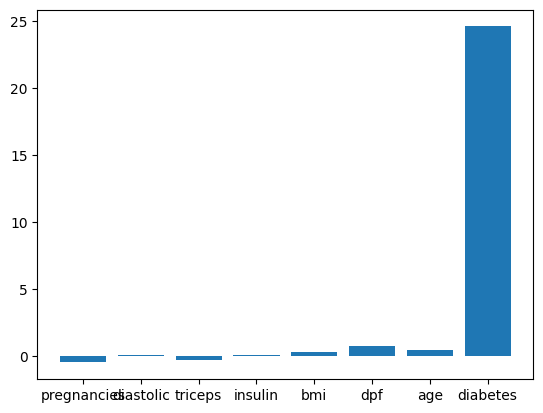

In [62]:
plt.bar(names, lasso.coef_);

# 3- How good your model

A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

- **True positive**: The customer churned and the model predicted they would.
- **False positive**: The customer didn't churn, but the model predicted they would.
- **True negative**: The customer didn't churn and the model predicted they wouldn't.
- **False negative**: The customer churned, but the model predicted they wouldn't.


| . | Predicted False | Predicted True |
|-|-| - |
| Actual False|True Negative | False Positive|
| Actual True| False Negative| True Positive|

From confusion matrix  we can calculate 
- Accuracy :The sum of true predictions divided by the total sum of the matrix.

$$Accuracy=\dfrac {TN + TP} {TN + TP + FN + TP}$$
    
    
- Recall (Sensitivity) : number of true positives divided by the sum of true positives and false negatives.
    - High recall reflects a lower false negative rate. For our classifier, it means predicting most fraudulent transactions correctly.
    
$$Sensitivity=\dfrac {TP} {TP +FN}$$
        
        
- Specificity : number of true negeative divided by the sum of all negatives predictions

$$Specificity=\dfrac {TN} {TN + FP}$$

- Precision : number of true positives divided by the sum of all positive predictions
   - High precision means having a lower false positive rate. For our classifier, this translates to fewer legitimate transactions being classified as fraudulent. 
   
$$ Persiscion = \dfrac {TP} {TP + FP} $$

- F1-score: harmonic mean of precision and recall. This metric gives equal weight to precision and recall

$$ F1-Score = 2 * \dfrac {Precision * Recall}  {Precision + Recall} $$

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
diabetes_df.head(1)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1


In [65]:
diabetes_df.shape

(768, 9)

In [66]:
X = diabetes_df[['bmi', 'age']].values
y = diabetes_df['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [67]:
y_test.shape

(231,)

In [68]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [69]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  35]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted avg       0.63      0.65      0.64       231



# 4- Logestic Regression

### A) Fitting a model

logistic regression is used for classification. This model calculates the probability, p, that an observation belongs to a binary class. 

Using our diabetes dataset as an example, 

- if p >= 0.5, we label the data as one, representing a prediction that an individual is more likely to have diabetes; 
- if p < 0.5, we label it zero to represent that they are more likely to not have diabetes. 

In [70]:
diabetes_df.head(1)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1


In [71]:
y = diabetes_df['diabetes'].values
X = diabetes_df.drop(['diabetes'], axis = 1).values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [74]:
logreg = LogisticRegression()

In [75]:
logreg.fit(X_train, y_train)

C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
logreg.score(X_test, y_test)

0.7402597402597403

In [77]:
y_pred = logreg.predict(X_test)

- We can predict probabilities of each instance belonging to a class by calling logistic regression's predict_proba method and passing the test features. 
- This returns a 2-dimensional array with probabilities for both classes, in this case, that the individual did not churn, or did churn, respectively. 
- We slice the second column, representing the positive class probabilities, 

In [78]:
y_pred_prob = logreg.predict_proba(X_test)

In [79]:
#The output eturns a 2-dimensional array with probabilities for both classes 0 and 1
#in this case, that the individual did not churn, or did churn, respectively. 
# the sum of each row equal to one
y_pred_prob

array([[0.73448972, 0.26551028],
       [0.81663435, 0.18336565],
       [0.87880389, 0.12119611],
       [0.84386446, 0.15613554],
       [0.5038874 , 0.4961126 ],
       [0.55417775, 0.44582225],
       [0.98640762, 0.01359238],
       [0.38353883, 0.61646117],
       [0.44359458, 0.55640542],
       [0.20688152, 0.79311848],
       [0.77188686, 0.22811314],
       [0.09960914, 0.90039086],
       [0.61558426, 0.38441574],
       [0.71437842, 0.28562158],
       [0.93046421, 0.06953579],
       [0.64019279, 0.35980721],
       [0.87284525, 0.12715475],
       [0.93133665, 0.06866335],
       [0.14132036, 0.85867964],
       [0.40641832, 0.59358168],
       [0.78804597, 0.21195403],
       [0.92446176, 0.07553824],
       [0.52986617, 0.47013383],
       [0.90654794, 0.09345206],
       [0.45642372, 0.54357628],
       [0.11356293, 0.88643707],
       [0.89170435, 0.10829565],
       [0.96976576, 0.03023424],
       [0.7270708 , 0.2729292 ],
       [0.88597876, 0.11402124],
       [0.

In [80]:
# We slice the second column, representing the positive class probabilities (churned)
y_pred_prob = y_pred_prob[:,1]

In [81]:
y_pred_prob[0]

0.26551028394826914

In [82]:
# Evaluation metrics for new threshold 
print("Evaluation metrics with threshold 0.5:") 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Precision:", precision_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred)) 
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.7402597402597403
Precision: 0.625
Recall: 0.625
F1 score: 0.625


- The default probability threshold for logistic regression in scikit-learn is zero-point-five. 
- Accroding to default probability threshould 0.5, first customer predicted to not churn
- What happens as we vary this threshold?

### B) Change Threshold form 0.5 to 0.9

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [84]:
# changing threshold and predicting 
print('prediction with threshold 0.9 :')
y_pred_prob
y_pred_new_threshold = (logreg.predict_proba(X_test)[:, 1] >= 0.9).astype(int) 
print(y_pred_new_threshold)


prediction with threshold 0.9 :
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [85]:
# Evaluation metrics for new threshold 
print("Evaluation metrics with threshold 0.9:") 
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold)) 
print("Precision:", precision_score(y_test, y_pred_new_threshold)) 
print("Recall:", recall_score(y_test, y_pred_new_threshold)) 
print("F1 score:", f1_score(y_test, y_pred_new_threshold))

Evaluation metrics with threshold 0.9:
Accuracy: 0.6666666666666666
Precision: 0.7142857142857143
Recall: 0.0625
F1 score: 0.11494252873563218


### C) ROC (receiver operating characteristic) curve  

We can use a receiver operating characteristic, or ROC curve, to visualize how different thresholds affect true positive and false positive rates. Here, the dotted line represents a chance model, which randomly guesses labels. 

- When the threshold equals zero
    - The model predicts one for all observations, meaning it will correctly predict all positive values, and incorrectly predict all negative values.
    

- If the threshold equals one
    - The model predicts zero for all data, which means that both true and false positive ratesare zero
    

- If we vary the threshold
    - We get a series of different false positive and true positive rates. 

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc 

In [87]:
#We unpack the results into three variables: false positive rate, FPR; true positive rate, TPR; and the thresholds
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
#For Threshold 0.9 
fpr_09, tpr_09, thresholds_09 = roc_curve(y_test, y_pred_new_threshold) 

In [88]:
y_pred_new_threshold

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

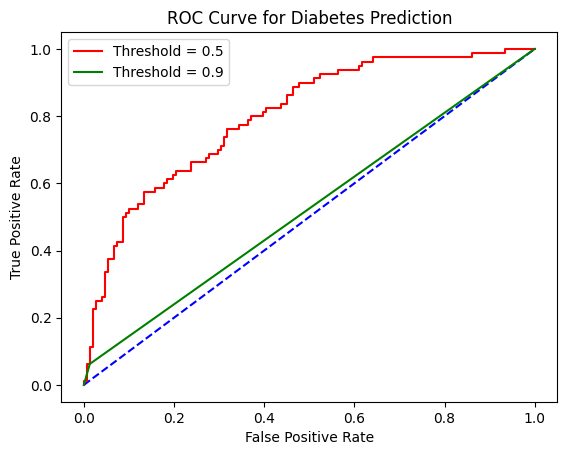

In [89]:
plt.plot([0,1], [0,1], linestyle = '--', color = 'b')
plt.plot(fpr,tpr, label = 'Threshold = 0.5', color = 'r')
plt.plot(fpr_09,tpr_09, label = 'Threshold = 0.9', color = 'g')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend()
plt.show()

### D) ROC AUC

##### how do we quantify the model's performance based on this plot? 
If we have a model with one for true positive rate and zero for false positive rate, this would be the perfect model.

**Therefore**, we calculate the area under the ROC curve, a metric known as AUC.

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc 

In [91]:
print('Area Under the ROC Curve for threshold 0.5:', roc_auc_score(y_test, y_pred_prob)) 
print('Area Under the ROC Curve for threshold 0.9:', roc_auc_score(y_test, y_pred_new_threshold)) 

Area Under the ROC Curve for threshold 0.5: 0.8002483443708608
Area Under the ROC Curve for threshold 0.9: 0.5246274834437086


Scores range from zero to one, with one being ideal. 
Here, the model with 0.5 threshold scores 0.80, which is only better than a model making random guesses. 

In [92]:
# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

[[121  30]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# 5- Hyperparameter tuning

- Ridge and Lasso regression : Choosing Alpha
- KNN : choosing n_neighbors. 

Parameters that we specify before fitting a model, like alpha and n_neighbors, are called hyperparameters

**Choosing the correct hyperparameters**

`1.` We can try lots of different values

`2.` fit all of them separately

`3.` see how well they perform

`4.` choose the best values! 

- This is called hyperparameter tuning. When fitting different hyperparameter values
- We use cross-validation to avoid overfitting the hyperparameters to the test set.
- We can still split the data, but perform cross-validation on the training set. We withhold the test set and use it for evaluating the tuned model. 

### A) Grid search cross-validation

Where we choose a grid of possible hyperparameter values to try. For example, we can search across two hyperparameters for a KNN model - the type of metric and a different number of neighbors. 

In [93]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso

In [94]:
y = diabetes_df['glucose'].values
X = diabetes_df.drop(['glucose'], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [95]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}


In [96]:
lasso = Lasso()

In [97]:
lasso_cv = GridSearchCV (lasso, param_grid, cv = kf)
lasso_cv.fit(X_train, y_train)
lasso_cv.best_params_ , lasso_cv.best_score_

({'alpha': 1e-05}, 0.335063599558501)

Grid search is great. However, the number of fits is equal to the number of hyperparameters multiplied by the number of values multiplied by the number of folds. 

**Therefore**, it doesn't scale well! So, 
- performing 3-fold cross-validation for one hyperparameter with 10 values each means 30 fits, 
- while 10-fold cross-validation on 3 hyperparameters with 10 values each equals 900 fits!  

We can perform a random search, which picks random hyperparameter values rather than exhaustively searching through all options

### B) Randomized Search cross-validation

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [99]:
#split data
y = diabetes_df['diabetes'].values
X = diabetes_df.drop(['diabetes'], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [100]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
            "penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]
             }

logreg = LogisticRegression()

In [101]:
#We can optionally set the n_iter argument, which determines the number of hyperparameter values tested. 
#So five-fold cross-validation with n_iter set to two performs 20 fits.
logreg_cv = RandomizedSearchCV (logreg, param_grid, cv = kf)
logreg_cv.fit(X_train, y_train)
logreg_cv.best_params_ , logreg_cv.best_score_

C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

({'tol': 0.7551265306122449,
  'penalty': 'l2',
  'class_weight': 'balanced',
  'C': 0.8530612244897959},
 0.7578573901003808)

### D) Evaluating on the test set

We can evaluate model performance on the test set by passing it to a call of the random search object's dot-score method. It actually performs slightly better than the best score in our grid search! 

In [102]:
logreg_cv.best_score_

0.7578573901003808

After tuning paramaters, model enhanced from 0.74 to 0.76

# 6- Processing Data Before Modeling

scikit-learn requires 
- Numeric data 
- No missing values.

### A) Dealing with categorical features

- scikit-learn will not accept categorical features by default
- need to convert categorical features into numeric features. 
- convet into multiple binary features called dummy variables, one for each category. we can use 
    - scikit-learn's OneHotEncoder.
    - pandas' get_dummies.

### B) Dealing with missing data

- drop rows with missing data if the missing data < 5% of total rows
- imputing data with approbiate values (mean, mode, median)
- Note we must split our data before imputing to avoid leaking test set information to our model

In [103]:
music_df = pd.read_csv('Dataset\music_clean.csv')

In [104]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])


print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 13)


In [105]:
X_cat = music_df['genre'].values.reshape(-1,1)
y = music_df['popularity'].values
X_cat.shape, y.shape

((1000, 1), (1000,))

### C) Imputation with scikit-learn

We will use different imputation methods for categorical and numeric features

**For categorical**
- First split them, storing as X_cat and X_num respectively, along with our target array as y. 
- We create categorical training and test sets. 
- We repeat this for the numeric features. 
- To impute missing categorical values we instantiate a SimpleImputer, setting strategy as most frequent. By default, SimpleImputer expects `np.NAN` to represent missing values. 
    - Now we call dot-fit_transform to impute the training categorical features' missing values! 
    - For the test categorical features, we call dot-transform. 
    
**For numerical** 
- We instantiate another imputer. By default, it fills values with the mean. 
- We fit and transform the training features, 
- Then transform the test features. 


We then combine our training data using `np.append()`, passing our two arrays, and set axis equal to 1. We repeat this for our test data. 

Due to their ability to transform our data, imputers are known as transformers. 

In [106]:
from sklearn.impute import SimpleImputer

X_cat = music_df['genre'].values.reshape(-1,1)
X_num = music_df.drop(['genre', 'popularity'], axis = 1).values
y = music_df['popularity'].values

X_tarin_cat, X_test_cat, y_trian_cat, y_test_cat = train_test_split(X_cat, y, test_size =0.2, random_state = 42)
X_tarin_num, X_test_num, y_trian_num, y_test_num = train_test_split(X_num, y, test_size =0.2, random_state = 42)

#create imputer for categorical
imp_cat = SimpleImputer(strategy = 'most_frequent')
X_train_cat = imp_cat.fit_transform(X_tarin_cat)
X_test_cat = imp_cat.transform(X_test_cat)

#create imputer for numerical
imp_num = SimpleImputer()
X_train_num = imp_cat.fit_transform(X_tarin_num)
X_test_num = imp_cat.transform(X_test_num)

#compin the numerical and categorical for X data
X_train = np.append(X_train_cat, X_train_num, axis =1)
X_test = np.append(X_test_cat, X_test_num, axis =1)



### D) Imputing within a pipeline

We can also impute using a pipeline, which is an object used to run a series of transformations and build a model in a single workflow. 

- Here we perform binary classification to predict whether a song is rock or another genre. 
- We drop missing values accounting for less than five percent of our data. 
- We convert values in the genre column, which will be the target, to a 1 if Rock, else 0, using `np.where()`. 
- We then create X and y. 
- To build a pipeline we construct a list of steps containing tuples with the step names specified as strings, and instantiate the transformer or model. 
- We pass this list when instantiating a Pipeline. 
- We then split our data, and fit the pipeline to the training data, as with any other model. 
- Finally, we compute accuracy. Note that, in a pipeline, each step but the last must be a transformer. 

In [107]:
from sklearn.pipeline import Pipeline

In [108]:
music_df = pd.read_csv('Dataset/music_clean.csv')

In [109]:
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


- The below cell will not executed as our data is already cleaned

In [110]:
# Remove values where less than 5% are missing
#music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
#music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

In [111]:
X = music_df.drop(['genre'], axis = 1).values
y = music_df['genre'].values

In [112]:
#create steps for the pipline
steps = [('imputation', SimpleImputer()),
         ('logistic_regression', LogisticRegression())]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [113]:
# Create the pipeline
pipeline = Pipeline(steps)

In [114]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputation', SimpleImputer()),
                ('logistic_regression', LogisticRegression())])

In [115]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[73 31]
 [12 84]]


In [116]:
pipeline.score(X_test, y_test)

0.785

# 7- Centering and scaling

Let's use `df.describe()` to check out the ranges of some of our feature variables in the music dataset. We see that the ranges vary widely: 

- duration_ms ranges from zero to one-point-six-two million
- speechiness contains only decimal places 
- loudness only has negative values! 

In [117]:
music = pd.read_csv('Dataset\music_clean.csv')
music.head(3)

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.116,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.239,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.125,-3.634,0.1490,122.897,0.228,1


In [118]:
music.columns

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')

In [119]:
music.drop(['Unnamed: 0'], axis =1, inplace = True)


In [120]:
music[['duration_ms', 'loudness', 'speechiness']].describe()

,duration_ms,loudness,speechiness
count,1.000000e+03,1000.000000,1000.000000
mean,2.172204e+05,-8.253305,0.077879
std,1.175582e+05,5.158523,0.089451
min,-1.000000e+00,-38.718000,0.023400
25%,1.806562e+05,-9.775500,0.033100
50%,2.163000e+05,-6.855000,0.043600
75%,2.605025e+05,-4.977750,0.074950
max,1.617333e+06,-0.883000,0.710000


Let's check out the ranges of some of our feature variables in the music dataset. We see that the ranges vary widely:

- duration_ms ranges from zero to one-point-six-two million
- speechiness contains only decimal places
- loudness only has negative values!

### A) Why scale our data?

- Many machine learning models use some form of distance to inform them, so if we have 
- Features on far larger scales, they can disproportionately influence our model. For example, 
- For Example: KNN uses distance explicitly when making predictions. 
- For this reason, we actually want features to be on a similar scale.
- To achieve this, we can normalize or standardize our data, often referred to as scaling and centering. 

##### How to scale our data?

There are several ways to scale our data: given any column, we can 

- subtract the mean and divide by the variance 
    - so that all features are centered around zero and have a variance of one. 
    - This is called standardization. 
    
 
- subtract the minimum and divide by the range of the data 
     - so the normalized dataset has minimum zero and maximum one. Or, we can 


- center our data so that it ranges from -1 to 1 instead. 
 

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
music_df = pd.read_csv('Dataset\music_clean.csv')

In [123]:
X = music_df.drop(['genre'], axis = 1).values
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [124]:
scaler = StandardScaler()

In [125]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

20666.582585618085 68890.98734103922
3.5971225997855074e-16 0.9999999999999996


Looking at the mean and standard deviation of the columns of both the original and scaled data verifies the change has taken place. 

### B) Scalling in pipline

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [128]:
#create pipeline
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors = 6))]
pipeline = Pipeline(steps)

In [129]:
#split the data
X = music_df.drop(['genre'], axis = 1).values 
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)

In [130]:
#fit the model
knn_scaled = pipeline.fit(X_train, y_train)

In [131]:
y_pred = knn_scaled.predict(X_test)

In [132]:
#check scaled model accuracy
knn_scaled.score(X_test, y_test)

0.91

#### Let's compare this to using unscaled data. 

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)
knn_unscaled = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)

In [134]:
knn_unscaled.score(X_test, y_test)

0.885

### C) CV and scaling in a pipeline

In [135]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [136]:
#create pipiline
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

In [137]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)


In [138]:
#create paramters for cross validation
params = {'knn__n_neighbors' : np.arange(1,50)}

In [139]:
kf = KFold(n_splits=3, shuffle=True, random_state=None)
knn_cv = GridSearchCV(pipeline, param_grid = params)#, cv = kf)

In [140]:
#fit the model
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [141]:
y_pred = knn_cv.predict(X_test)

In [142]:
knn_cv.best_params_

{'knn__n_neighbors': 6}

In [143]:
knn_cv.best_score_

0.9099999999999999

# 8- Evaluating multiple models

But how do we decide which model to use in the first place? 
the answer depends on our situation. However, there are some principles that can guide us when making this decision.

- The size of our dataset plays a role. 
    - Fewer features means a simpler model, and can reduce training time.
    - Some models, such as Artificial Neural Networks, require a lot of data to perform well. 
    
- interpretability
    - so we can explain to stakeholders how predictions were made. 
    - An example is linear regression, where we can calculate and interpret the model coefficients. 
    
- Flexibility
    - May improve accuracy by making fewer assumptions about the data 
    - for example, a KNN model does not assume a linear relationship between the features and the target.

### It's all in the metrics

- Regression models can be evaluated using the 
    - root mean squared error RMSE
    - R-squared value. 


- Likewise, classification models can all be analyzed using 
    - Accuracy, 
    - Confusion matrix
    - Precision, Recall, F1-Score
    - ROC AUC. 
    
one approach is to select several models and a metric, then evaluate their performance without any form of hyperparameter tuning. 

performance of some models, such as 

- KNN
- Linear regression
- Logistic regression
- Artificial Neural Network

are affected by scaling our data. Therefore, it is generally best to scale our data before evaluating models out of the box.

We will evaluate three models for binary classification of song genre: **KNN, logistic regression, and a new model called a decision tree classifier**.

In [144]:
#import requried modles
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [145]:
X = music_df.drop(['genre'], axis = 1).values
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [146]:
#scaler the data
scaler = StandardScaler()

In [147]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
models = {'Logistic Regression': LogisticRegression(),
           'KNN': KNeighborsClassifier(),
           'Decision Tree': DecisionTreeClassifier()
            }
results = []

In [149]:
for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv = kf)
    results.append(cv_results) 

In [150]:
results

[array([0.96 , 0.896, 0.912, 0.936, 0.976, 0.888]),
 array([0.944, 0.888, 0.88 , 0.904, 0.936, 0.856]),
 array([1.   , 1.   , 0.992, 1.   , 1.   , 0.984])]

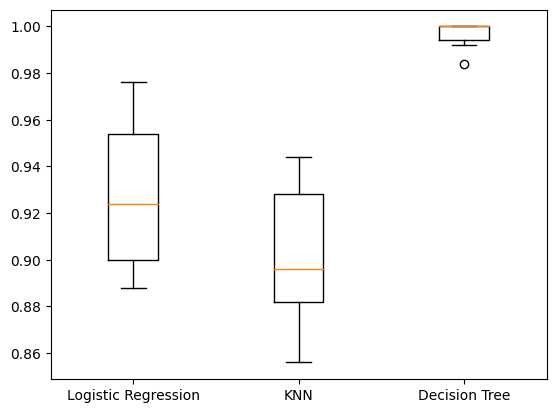

In [151]:
plt.boxplot(results, labels = models.keys())
plt.show()

We can see Desicion Tree has the best median score.

#### Test set performance

In [152]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print('{} Test Accuracy: {}'.format(name, test_score))

Logistic Regression Test Accuracy: 0.864
KNN Test Accuracy: 0.888
Decision Tree Test Accuracy: 1.0


Desicion Tree performs best for this problem if we are using accuracy as the metric. 